## École Polytechnique de Montréal
## Département Génie Informatique et Génie Logiciel

## INF8460 – Traitement automatique de la langue naturelle - TP1

## Objectifs d'apprentissage: 

•	Savoir accéder à un corpus, le nettoyer et effectuer divers pré-traitements sur les données
•	Savoir effectuer une classification automatique des textes pour l’analyse de sentiments
•	Evaluer l’impact des pré-traitements sur les résultats obtenus


## Équipe et contributions 
Veuillez indiquer la contribution effective de chaque membre de l'équipe en pourcentage et en indiquant les modules ou questions sur lesquelles chaque membre a travaillé


Nom Étudiant 1: Luu Thien-Kim (1834378) 33.33%

Nom Étudiant 2: Mellouk Souhaila (1835144) 33.33%

Nom Étudiant 3: Younes Mourad (1832387) 33.33%

Nous avons tous travaillé ensemble sur chaque question

## Librairies externes

In [1088]:
import os
import pandas as pd
from typing import List, Literal, Tuple

## Valeurs globales

In [1089]:
data_path = "data"
output_path = "output"

## Données

In [1090]:
def read_data(path: str) -> Tuple[List[str], List[bool], List[Literal["M", "W"]]]:
    data = pd.read_csv(path)
    inputs = data["response_text"].tolist()
    labels = (data["sentiment"] == "Positive").tolist()
    gender = data["op_gender"].tolist()
    return inputs, labels, gender

In [1091]:
train_data = read_data(os.path.join(data_path, "train.csv"))
test_data = read_data(os.path.join(data_path, "test.csv"))

train_data = ([text.lower() for text in train_data[0]], train_data[1], train_data[2])
test_data = ([text.lower() for text in test_data[0]], test_data[1], test_data[2])

In [1092]:
def getSentiment(data):
    sentimentList = []
    for sentiment in data:
        if sentiment:
            sentimentList.append("Positive")
        else:
            sentimentList.append("Negative")
    return sentimentList

## 1. Pré-traitement et Exploration des données

### Lecture et prétraitement

Dans cette section, vous devez compléter la fonction preprocess_corpus qui doit être appelée sur les fichiers train.csv et test.csv. La fonction preprocess_corpus appellera les différentes fonctions créées ci-dessous. Les différents fichiers de sortie doivent se retrouver dans le répertoire output.  Chacune des sous-questions suivantes devraient être une ou plusieurs fonctions.

In [1093]:
train_path = os.path.join(data_path, "train.csv")
test_path = os.path.join(data_path, "test.csv")

train_phrases_path = os.path.join(output_path, "train_phrases.csv")
test_phrases_path = os.path.join(output_path, "test_phrases.csv")

In [1094]:
def lowerCases(data):
    return ([text.lower() for text in data[0]], data[1], data[2])

#### 1) Segmentez chaque corpus en phrases, et stockez-les dans un fichier `nomcorpus`_phrases.csv (une phrase par ligne)

In [1095]:
import nltk
nltk.download("punkt") 
nltk.download("wordnet")
import csv

def segmentSentences(path) :
    data = lowerCases(read_data(path))
    corpus = data[0]
    sentiment = getSentiment(data[1])
    if not os.path.isdir(output_path) :
        try:
            os.mkdir(output_path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s " % path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_phrases.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            sentences = nltk.sent_tokenize(corpus[i])
            for sentence in sentences:
                sentence = sentence.replace('"', '""').replace('"', '""')
                f.write('"'+ sentence +'"' + ',' + '"' +sentiment[i]+ '"'+ ',' + '"'+data[2][i] + '"\n')
                
    return newFilePath


[nltk_data] Downloading package punkt to /Users/kimluu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kimluu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1096]:
segmentSentences(train_path)
segmentSentences(test_path)

'output/test_phrases.csv'

#### 2) Normalisez chaque corpus au moyen d’expressions régulières en annotant les négations avec _Neg L’annotation de la négation doit ajouter un suffixe _NEG à chaque mot qui apparait entre une négation et un signe de ponctuation qui identifie une clause. Exemple : 
No one enjoys it.  no one_NEG enjoys_NEG it_NEG .

I don’t think I will enjoy it, but I might.  i don’t think_NEG i_NEG will_NEG enjoy_NEG it_NEG, but i might.

In [1097]:
def getPath(path) :
    if "train" in path :
        path = train_path
    elif "test" in path :
        path = test_path
        
    return path

In [1098]:
import re

def normalize(path) :
    with open(path, "r") as f :
        data = list(f)
    
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_negation.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f:
        for sentence in data:
            match = re.sub("(?i)(?<=not |n't | no )(.*?[,.(?!;]+)", lambda m: m.group(1).replace(" ", "_NEG ")
                           .replace(".", "_NEG.").replace(",", "_NEG,").replace("?", "_NEG?").replace("!", "_NEG!")
                           .replace("(", "_NEG(").replace(";", "_NEG;"), sentence)
            second_match = re.sub("(?<=No |NO )(.*?[,.(?!;]+)", lambda m: m.group(1).replace(" ", "_NEG ")
                           .replace(".", "_NEG.").replace(",", "_NEG,").replace("?", "_NEG?").replace("!", "_NEG!")
                           .replace("(", "_NEG(").replace(";", "_NEG;"), match)
            f.write(match)     
    return newFilePath
            

In [1099]:
normalize(train_phrases_path)
normalize(test_phrases_path)

'output/test_negation.csv'

#### 3) Segmentez chaque phrase en mots (tokenisation) et stockez-les dans un fichier `nomcorpus`_mots.csv. (Une phrase par ligne, chaque token séparé par un espace, il n’est pas nécessaire de stocker la phrase non segmentée ici) ;

In [1100]:
def tokenize(path) :
    sentences = []
    
    data = read_data(path)
    corpus = data[0]        
    
    sentiment = getSentiment(data[1])
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_mots.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            listTokens = nltk.word_tokenize(corpus[i])
            tokens = ' '.join(listTokens)
            f.write('"' + tokens + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath

In [1101]:
tokenize(train_phrases_path)
tokenize(test_phrases_path)

train_mots_path = os.path.join(output_path, "train_mots.csv")
test_mots_path = os.path.join(output_path, "test_mots.csv")

#### 4) Lemmatisez les mots et stockez les lemmes dans un fichier `nomcorpus`_lemmes.csv (une phrase par ligne, les lemmes séparés par un espace) ;

In [1102]:
def lemmatize(path) :
    with open(path, "r") as f :
        data = list(f)
        
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_lemmes.csv"
    lemmzer = nltk.WordNetLemmatizer()
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        for sentences in data :
            lemmes = [lemmzer.lemmatize(token) for token in sentences.split()]
            sentences = ' '.join(lemmes)
            f.write(sentences+'\n')
                
    return newFilePath

In [1103]:
lemmatize(train_mots_path)
lemmatize(test_mots_path)

'output/test_lemmes.csv'

#### 5) Retrouvez la racine des mots (stemming) en utilisant nltk.PorterStemmer(). Stockez-les dans un fichier `nomcorpus`_stems.csv (une phrase par ligne, les racines séparées par une espace) ;

In [1104]:
def stemmize(path) :    

    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
        
    path = getPath(path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_stems.csv"
    
    stemmer = nltk.PorterStemmer()
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f:
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            stems = [stemmer.stem(token) for token in corpus[i].split()]
            sentences = ' '.join(stems)
            f.write('"' + sentences + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath
    

In [1105]:
stemmize(train_mots_path)
stemmize(test_mots_path)

'output/test_stems.csv'

#### 6) Ecrivez une fonction qui supprime les mots outils (stopwords) du corpus. Vous devez utiliser la liste de stopwords de NLTK ;

In [1106]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

def deleteStopWords(path) :

    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
        
    path = getPath(path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_stopWords.csv"
    stopwords_english = set(stopwords.words("english"))
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
                newSentence = [token for token in nltk.word_tokenize(corpus[i]) if token not in stopwords_english]
                sentences = ' '.join(newSentence)
                if sentences == "" :
                    sentences = " "
                f.write('"' + sentences + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimluu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1107]:
deleteStopWords(train_mots_path)
deleteStopWords(test_mots_path)

'output/test_stopWords.csv'


#### 7) Écrivez une fonction preprocess_corpus(corpus) qui prend un corpus brut stocké dans un fichier.csv, effectue les étapes précédentes, puis stocke le résultat de ces différentes opérations dans un fichier corpus _norm.csv

In [1108]:
from shutil import copyfile

def preprocess_corpus(input_file: str, output_file: str) :
    data = read_data(input_file)
    results = deleteStopWords(stemmize(lemmatize(tokenize(normalize(segmentSentences(input_file))))))
    copyfile(results, output_file)

In [1109]:
preprocess_corpus(
   os.path.join(data_path, "train.csv"), os.path.join(output_path, "train_norm.csv")
)
preprocess_corpus(
   os.path.join(data_path, "test.csv"), os.path.join(output_path, "test_norm.csv")
)

### Exploration des données

#### 1)

Complétez les fonctions retournant les informations suivantes (une fonction par information, chaque fonction prenant en argument un corpus composé d'une liste de phrases segmentées en tokens(tokenization)) ou une liste de genres et une liste de sentiments:

In [1110]:
corpus = [['soso.', 'kim a acheté un mbp13 silver!', 'mourad a acheté un mbp16 spacegrey']]
corpus = [['soso', 'a', 'acheté', 'un', 'mbp16', 'silver', '.', 'Je', 'ne', 'suis', 'pas', 'daccord!'],
          ['kim', 'a', 'acheté', 'un', 'mpb13', 'silver','.'], 
          ['mourad', 'a', 'acheté', 'un', 'mbp16', 'spacegrey', '.', 'Quil', 'aime', 'beaucoup']]
corpus = [["I", "do", "not", "agree_NEG", "with_NEG", "this_NEG!", "I", "prefer", "the", "other", "option"],
           ["I", "really", "like", "that", "new", "mbp16", "Mourad", "made", "a", "good", "choice"],
           ["I", "don't", "think_NEG", "that_NEG.", "I", "prefer", "the", "mbp13"]]

In [1111]:
#Return if the corpus is tokenized or not
def isTokenized(corpus) :
    for sentences in corpus :
        for sentence in corpus :
            for l in sentence :
                if ' ' in l :
                    return 0
    return 1

In [1112]:
#Return the corpus as a list of documents, that are not tokenizated, but segmented in sentences
def getListOfSentences(corpus):
    listOfDocs = []
    listOfTokens = []
    if isTokenized(corpus) :
        for sentences in corpus :
            for token in sentences :
                listOfTokens.append(token)
            s = ' '.join(listOfTokens)
            s = nltk.sent_tokenize(s)
            listOfDocs.append(s)
            listOfTokens = []
    return listOfDocs

In [1113]:
getListOfSentences(corpus)

[['I do not agree_NEG with_NEG this_NEG!', 'I prefer the other option'],
 ['I really like that new mbp16 Mourad made a good choice'],
 ["I don't think_NEG that_NEG.", 'I prefer the mbp13']]

##### a. Le nombre total de tokens (mots non distincts)

In [1114]:
def getNumberOfTokens(corpus):
    corpus = getListOfSentences(corpus)
    count = 0
    for sentences in corpus :
        for sentence in sentences :
            count = count + len(nltk.word_tokenize(sentence))
    return count

In [1115]:
getNumberOfTokens(corpus)

33

##### b. Le nombre total de types

In [1116]:
def getNumberOfTypes(corpus):
    corpus = getListOfSentences(corpus)
    listOfTokens = []
    for sentences in corpus :
        for sentence in sentences :
            tokenList = nltk.word_tokenize(sentence)
            for token in tokenList :
                listOfTokens.append(token)
    listOfTypes = list(dict.fromkeys(listOfTokens))  
    return len(listOfTypes)

In [1117]:
getNumberOfTypes(corpus)

26

##### c. Le nombre total de phrases avec négation

In [1118]:
def getNumberOfNeg(corpus) :
    corpus = getListOfSentences(corpus)
    numberOfNegativeSentences = 0;
    for sentences in corpus:
        for sentence in sentences:
            if "_NEG" in sentence:
                numberOfNegativeSentences = numberOfNegativeSentences + 1
    return numberOfNegativeSentences

In [1119]:
getNumberOfNeg(corpus)

2

##### d. Le ratio token/type

In [1120]:
def getRatioTokenType(corpus):
    return float(getNumberOfTokens(corpus)/getNumberOfTypes(corpus))

In [1121]:
getRatioTokenType(corpus)

1.2692307692307692

##### e. Le nombre total de lemmes distincts

In [1122]:
import nltk
def getLemmesNumber(corpus):
    corpus = getListOfSentences(corpus)
    lemmzer = nltk.WordNetLemmatizer()
    lemmesList = []
    for sentences in corpus :
        for sentence in sentences :
            lemmes = [lemmzer.lemmatize(token) for token in sentence.split()]
            for lemme in lemmes :  
                lemmesList.append(lemme)
    
    lemmesList = list(dict.fromkeys(lemmesList))   
    return len(lemmesList)

In [1123]:
getLemmesNumber(corpus)

24

##### f. Le nombre total de racines (stems) distinctes

In [1124]:
import nltk
def getStemsNumber(corpus):
    corpus = getListOfSentences(corpus)
    stemmer = nltk.PorterStemmer()
    stemsList = []
    for sentences in corpus :
        for sentence in sentences :
            stems = [stemmer.stem(token) for token in sentence.split()]
            for stem in stems :
                stemsList.append(stem)
    stemsList = list(dict.fromkeys(stemsList))     
    return len(stemsList)

In [1125]:
getStemsNumber(corpus)

24

##### g. Le nombre total de documents (par classe)

In [1126]:
def getNumberOfDocPerClass(sentiments):
    countPositive = 0
    countNegative = 0
    for sentiment in sentiments : 
        if sentiment : #positif
            countPositive = countPositive + 1
        else : #negatif
            countNegative = countNegative + 1
    return countPositive, countNegative
        
        

In [1127]:
semtiments = [0,
          0,
          0,
          0,
          0, #5 negatif
          1,
          1,
          1,
          1,
          1,
          1] #6 positif

getNumberOfDocPerClass(semtiments)

(6, 5)

##### h. Le nombre total de phrases (par classe)

In [1128]:
def getNumberOfSentencesPerClass(corpus, sentiments) :
    corpus = getListOfSentences(corpus)
    countSentencesPositives = 0
    countSentencesNegatives = 0
    for i in range(len(corpus)):
        if sentiments[i] : #positive
            countSentencesPositives = countSentencesPositives + len(corpus[i])
        else : #negative
            countSentencesNegatives = countSentencesNegatives + len(corpus[i])          
    return countSentencesPositives, countSentencesNegatives   

In [1129]:
sentiments = [0,1,1]
getNumberOfSentencesPerClass(corpus, sentiments)

(3, 2)

##### i. Le nombre total de phrases avec négation (par classe)

In [1130]:
def getNumberOfNegativeSentences(corpus, sentiments) :
    corpus = getListOfSentences(corpus)
    countNegativeSentencesPositives = 0
    countNegativeSentencesNegatives = 0
    i = 0;
    for sentences in corpus:
        for sentence in sentences:
            if sentiments[i]: #positive
                if "_NEG" in sentence:
                    countNegativeSentencesPositives = countNegativeSentencesPositives + 1
            else: #negative
                if "_NEG" in sentence:
                    countNegativeSentencesNegatives = countNegativeSentencesNegatives + 1
            i = i + 1
    return countNegativeSentencesPositives, countNegativeSentencesNegatives

In [1131]:
sentiments = [0,1,1,1,1]
getNumberOfNegativeSentences(corpus, sentiments)

(1, 1)

##### j. Le pourcentage de réponses positives par genre de la personne à qui cette réponse est faite (op_gender)

In [1132]:
genders = [['M', 'M', 'W', 'W', 'M', 'M', 'W', 'W', 'M', 'M', 'W', 'W']]
sentiments = [1 , 0, 1, 0, 1 , 0, 1,
             0, 0, 1,  0, 0]

In [1133]:
def getPourcentageOfPositiveReponsesPerGender(genders, sentiments):
    countPosM = countPosW = 0
    iterator = 0
    totalResponse = len(sentiments)
  
    for sentiment in sentiments:
        if sentiment :
            if genders[0][iterator] == 'M':
                countPosM = countPosM + 1
            elif genders[0][iterator] == 'W':
                countPosW = countPosW + 1
        iterator = iterator + 1
  
    pourcentageW = float(countPosW / totalResponse) * 100
    pourcentageM = float(countPosM / totalResponse) * 100
  
    return(pourcentageM,pourcentageW)       

In [1134]:
getPourcentageOfPositiveReponsesPerGender(genders, sentiments)

(25.0, 16.666666666666664)

#### 2) Écrivez la fonction explore(corpus, sentiments, genders) qui calcule et affiche toutes ces informations, précédées d'une légende reprenant l’énoncé de chaque question (a,b, ….j).

In [1135]:
def explore(
    corpus: List[List[str]], sentiments: List[bool], genders: List[Literal["M", "W"]]
) -> None:
    print("Le nombre total de tokens (mots non distincts) : " + getNumberOfTokens(corpus) + "\n")
    print("Le nombre total de types : " + getNumberOfTypes(corpus) + "\n")
    print("Le nombre total de phrases avec négation : " + getNumberOfNeg(corpus)  + "\n")
    print("Le ratio token/type : " + getRatioTokenType(corpus) + "\n")
    print("Le nombre total de lemmes distincts : " + getLemmesNumber(corpus) + "\n")
    print("Le nombre total de racines (stems) distinctes : " + getStemsNumber(corpus) + "\n")
    print("Le nombre total de documents (par classe) : " + getNumberOfDocPerClass(semtiments) + "\n")
    print("Le nombre total de phrases (par classe) : " + getNumberOfSentencesPerClass(corpus, sentiments) + "\n")
    print("Le nombre total de phrases avec négation (par classe) : " + getNumberOfNegativeSentences(corpus, sentiments)  + "\n")
    print("Le pourcentage de réponses positives par genre de la personne à qui cette réponse est faite (op_gender) : " 
          + getPourcentageOfPositiveReponsesPerGender(sentiments, genders)  + "\n")

    

#### 3) Calculer une table de fréquence (lemme, rang (le mot le plus fréquent a le rang 1 etc.) ; fréquence (le nombre de fois où il a été vu dans le corpus).  Seuls les N mots les plus fréquents du vocabulaire (N est un paramètre) doivent être gardés. Vous devez stocker les 1000 premières lignes de cette table dans un fichier nommé table_freq.csv

In [1136]:
def calculateFrequences(corpus) :
   
    corpus = getListOfSentences(corpus)
    lemmzer = nltk.WordNetLemmatizer()
    lemmesList = []
    sorted_dict = {}
   
    newFilePath = output_path + '/' + " table_freq.csv"
    file = open(newFilePath, "w")
    
    for sentences in corpus :
        for sentence in sentences :
            lemmes = [lemmzer.lemmatize(token) for token in sentence.split()]
            for lemme in lemmes :
                lemmesList.append(lemme)
               
    for word in lemmesList:
        if word not in sorted_dict:
            sorted_dict[word] = 0
        sorted_dict[word] += 1
    words = sorted_dict.items()
    sorted_lemme = sorted(words, key= lambda kv: kv[1], reverse=True)
    
    if(len(sorted_lemme) >= 1000) :
        sorted_lemme = (sorted_lemme[:1000])
    
    with open(newFilePath, "w") as f: 
        f.write("word" + ',' + "freq" + '\n')
        for i in range(0, len(sorted_lemme)):
            f.write('"' + sorted_lemme[i][0] + '"' + ',' + '"' + str(sorted_lemme[i][1]) + '"\n')
            
    return file

In [1137]:
calculateFrequences(corpus)

<_io.TextIOWrapper name='output/ table_freq.csv' mode='w' encoding='UTF-8'>

## 2. Classification automatique

### a) Classification  automatique avec un modèle sac de mots (unigrammes), Naive Bayes et la régression logistique

En utilisant la librairie scikitLearn et l’algorithme Multinomial Naive Bayes et Logistic Regression, effectuez la classification des textes avec un modèle sac de mots unigramme pondéré avec TF-IDF.  Vous devez entrainer chaque modèle sur l’ensemble d’entrainement et le construire à partir de votre fichier corpus_train.csv. 

Construisez et sauvegardez votre modèle sac de mots avec les données d’entrainement en testant les pré-traitements suivants (séparément et en combinaison): tokenisation, lemmatisation, stemming, normalisation des négations, et suppression des mots outils. Vous ne devez garder que la combinaison d’opérations qui vous donne les meilleures performances sur le corpus de test. Indiquez dans un commentaire les pré-traitements qui vous amènent à votre meilleure performance (voir la section 3 – évaluation). Il est possible que la combinaison optimale ne soit pas la même selon que vous utilisiez la régression logistique ou Naive Bayes. On s’attend à avoir deux modèles optimaux, un pour Naive Bayes, et un avec régression logistique.

In [1138]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [1139]:
def getDataSet(train_csv, test_csv):
    trainPath = os.path.join(output_path, train_csv)
    testPath = os.path.join(output_path, test_csv)
    
    trainData = read_data(trainPath)
    testData = read_data(testPath)
    
    return trainData,testData

In [1140]:
training_data, testing_data = getDataSet("train_phrases.csv", "test_phrases.csv" )

### Naive Bayes

In [1189]:
def naiveBayes(train_data, test_data):
    vectorizer = TfidfVectorizer()    
    vectors = vectorizer.fit_transform(train_data[0])
    clf = MultinomialNB(alpha=0.5)
    clf.fit(vectors, train_data[1])
    
    vectors_test = vectorizer.transform(test_data[0])
    y_pred = clf.predict(vectors_test)
    return y_pred

In [1203]:
train_bayes = deleteStopWords(normalize(train_phrases_path))
test_bayes = deleteStopWords(normalize(test_phrases_path))

training_data_bayes, testing_data_bayes = getDataSet(os.path.basename(train_bayes), os.path.basename(test_bayes) )
y_pred_bayes = naiveBayes(training_data_bayes, testing_data_bayes)
print(classification_report(testing_data[1], y_pred_bayes, digits=5))

              precision    recall  f1-score   support

       False    0.78191   0.29697   0.43045       495
        True    0.81732   0.97434   0.88895      1598

    accuracy                        0.81414      2093
   macro avg    0.79962   0.63566   0.65970      2093
weighted avg    0.80895   0.81414   0.78052      2093



### Régression Logistique

In [1197]:
def logisticsRegression(train_data, test_data, regParamC):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(train_data[0])
    model = LogisticRegression(C=regParamC)
    model.fit(vectors, train_data[1])
    
    vectors_test = vectorizer.transform(test_data[0])
    y_pred = model.predict(vectors_test)
    return y_pred

In [1204]:
train_logisticsRegression = lemmatize(tokenize(normalize(train_phrases_path)))
test_logisticsRegression = lemmatize(tokenize(normalize(test_phrases_path)))

training_data_logistics, testing_data_logistics = getDataSet(os.path.basename(train_logisticsRegression), os.path.basename(test_logisticsRegression))
y_pred_logisticsRegression = logisticsRegression(training_data, testing_data, 1.0 )
print(classification_report(testing_data[1], y_pred_logisticsRegression, digits=5))

              precision    recall  f1-score   support

       False    0.73737   0.29495   0.42136       495
        True    0.81583   0.96746   0.88520      1598

    accuracy                        0.80841      2093
   macro avg    0.77660   0.63120   0.65328      2093
weighted avg    0.79728   0.80841   0.77550      2093



###  b) Autre représentation pour l’analyse de sentiments et classification automatique

On vous propose maintenant d’utiliser une nouvelle représentation de chaque document à classifier.
Vous devez créer à partir de votre corpus la table suivante :

| Vocabulaire | Freq-positive | Freq-négative |
|-------------|---------------|---------------|
| happy | 10 | 1 |
| ... | ... | ... |

Où :

• Vocabulaire représente tous les types (mots uniques) de votre corpus d’entrainement

• Freq-positive : représente la somme des fréquences du mot dans tous les documents de la classe positive

• Freq-négative : représente la somme des fréquences du mot dans tous les documents de la classe négative

Notez qu’en Python, vous pouvez créer un dictionnaire associant à tout (mot, classe) une fréquence.
Ensuite il vous suffit de représenter chaque document par un vecteur à 3 dimensions dont le premier élément représente un biais (initialisé à 1), le deuxième élément représente la somme des fréquences positives (freq-pos) de tous les mots uniques (types) du document et enfin le troisième élément représente la somme des fréquences négative (freq-neg) de tous les mots uniques du document. 

En utilisant cette représentation ainsi que les pré-traitements suggérés, trouvez le meilleur modèle possible en testant la régression logistique et Naive Bayes. Vous ne devez fournir que le code de votre meilleur modèle dans votre notebook.

In [1211]:
import pandas as pd

def getTableOfFrequencies(corpus) :
    dictionnary = {}
    listOfTokens = []
    data = []

    for i in range(len(corpus[0])) :
        tokenList = nltk.word_tokenize(corpus[0][i])
        for token in tokenList :
            listOfTokens.append(token)
            key = (token, corpus[1][i])
            if key in dictionnary : #if the key already exists in dic, increment frequency
                dictionnary[key] = dictionnary[key] + 1
            else : #if not, create key and initiate frequency to 1
                dictionnary.update({key : 1})
        listOfTokens = list(dict.fromkeys(listOfTokens)) #list of distinct tokens

    for token in listOfTokens :
        freq_pos = 0
        freq_neg = 0
        if (token, True) in dictionnary and (token, False) in dictionnary :
            freq_pos = dictionnary[token, True]
            freq_neg = dictionnary[token, False]
        if (token, True) in dictionnary and (token, False) not in dictionnary :
            freq_pos = dictionnary[token, True]
        if (token, True) not in dictionnary and (token, False) in dictionnary :
            freq_neg = dictionnary[token, False]
        data.append([token, freq_pos, freq_neg])    

    return pd.DataFrame(data, columns=["Vocabulaire", "Freq-positive", "Freq-négative"])

In [1212]:
getTableOfFrequencies(testing_data_bayes)

,Vocabulaire,Freq-positive,Freq-négative
0,thanks,95,2
1,back,41,6
2,!,776,105
3,yep,1,0
4,",",355,176
...,...,...,...
4234,tingles,1,0
4235,jumping,1,0
4236,ship,1,0
4237,fiber,1,0


In [1213]:
getTableOfFrequencies(testing_data_logistics)

,Vocabulaire,Freq-positive,Freq-négative
0,thanks,95,2
1,back,41,6
2,!,776,105
3,yep,1,0
4,",",355,176
...,...,...,...
4156,tingle,1,0
4157,jumping,1,0
4158,ship,1,0
4159,fiber,1,0


## 3. Évaluation et discussion

#### a) Pour déterminer la performance de vos modèles, vous devez tester vos modèles de classification sur l’ensemble de test et générer vos résultats pour chaque modèle dans une table avec les métriques suivantes : Accuracy et pour chaque classe, la précision, le rappel et le F1 score. On doit voir cette table générée dans votre notebook avec la liste de vos modèles de la section 2 et leurs performances respectives. 

In [1147]:
y_pred_bayes = naiveBayes(training_data, testing_data)
print(classification_report(testing_data[1], y_pred_bayes))

              precision    recall  f1-score   support

       False       0.78      0.30      0.43       495
        True       0.82      0.97      0.89      1598

    accuracy                           0.81      2093
   macro avg       0.80      0.64      0.66      2093
weighted avg       0.81      0.81      0.78      2093



In [1148]:
y_pred_regression = logisticsRegression(training_data, testing_data,1.0)
print(classification_report(testing_data[1], y_pred_regression))

              precision    recall  f1-score   support

       False       0.74      0.29      0.42       495
        True       0.82      0.97      0.89      1598

    accuracy                           0.81      2093
   macro avg       0.78      0.63      0.65      2093
weighted avg       0.80      0.81      0.78      2093



#### b) Générez un graphique qui représente la performance moyenne (mean accuracy – 10 Fold cross-validation) de vos différents modèles par tranches de 500 textes sur l’ensemble d’entrainement.

In [1149]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt 

In [1150]:
def chooseClassification(models):
    vec = TfidfVectorizer().fit_transform(train_data[0])
    if models == 'LR' :   
        model = LogisticRegression(C=1.0)
        model.fit(vec, train_data[1])
    if models == 'NB' :    
        model = MultinomialNB(alpha=0.5)
        model.fit(vec, train_data[1])
    return model

In [1151]:
def applyFoldCrossValidation(model, X_train, Y_train):
    KFold = RepeatedKFold(n_splits=10)
    accuracies = cross_val_score(model, X_train, Y_train,cv=KFold)
    return accuracies

In [1152]:
X_abs = []
Maccuracies_LogisticRegression = []
Maccuracies_NaiveBayes = []

def findMeanAccuracy():
    accuracy_LogisticRegression = []
    accuracy_NaiveBayes = []
    k = 0
    
    vec = TfidfVectorizer()

    for i in range(0, int(len (train_data[0]) / 500)):
        train = train_data[0][0+k : 500 +k]
        test = train_data[1][0+k : 500 +k]
        
        vecTransformation = vec.fit_transform(train)
        X_training, X_testing, Y_training, Y_testing = train_test_split(vecTransformation, test)
        
        accuracy_LogisticRegression = applyFoldCrossValidation(chooseClassification('LR'),X_training,Y_training)
        accuracy_NaiveBayes = applyFoldCrossValidation(chooseClassification('NB'),X_training,Y_training)
        Maccuracies_LogisticRegression.append(accuracy_LogisticRegression.mean())
        Maccuracies_NaiveBayes.append(accuracy_NaiveBayes.mean())
        X_abs.append(k)
        k = k+ 500

In [1153]:
findMeanAccuracy()

In [1154]:
def GenerateMeanAccuranciesGraph():
    plt.figure(figsize=(40, 20))
    plt.suptitle('Graphique de la performance moyenne', fontsize=40, fontweight='bold')
    plt.plot(X_abs, Maccuracies_LogisticRegression)
    plt.plot(X_abs, Maccuracies_NaiveBayes)
    plt.xticks(X_abs, fontsize=25)
    plt.yticks( fontsize=25)
    plt.legend(["Logistic Regression", "Naive Bayes"], fontsize=40)
    plt.show()

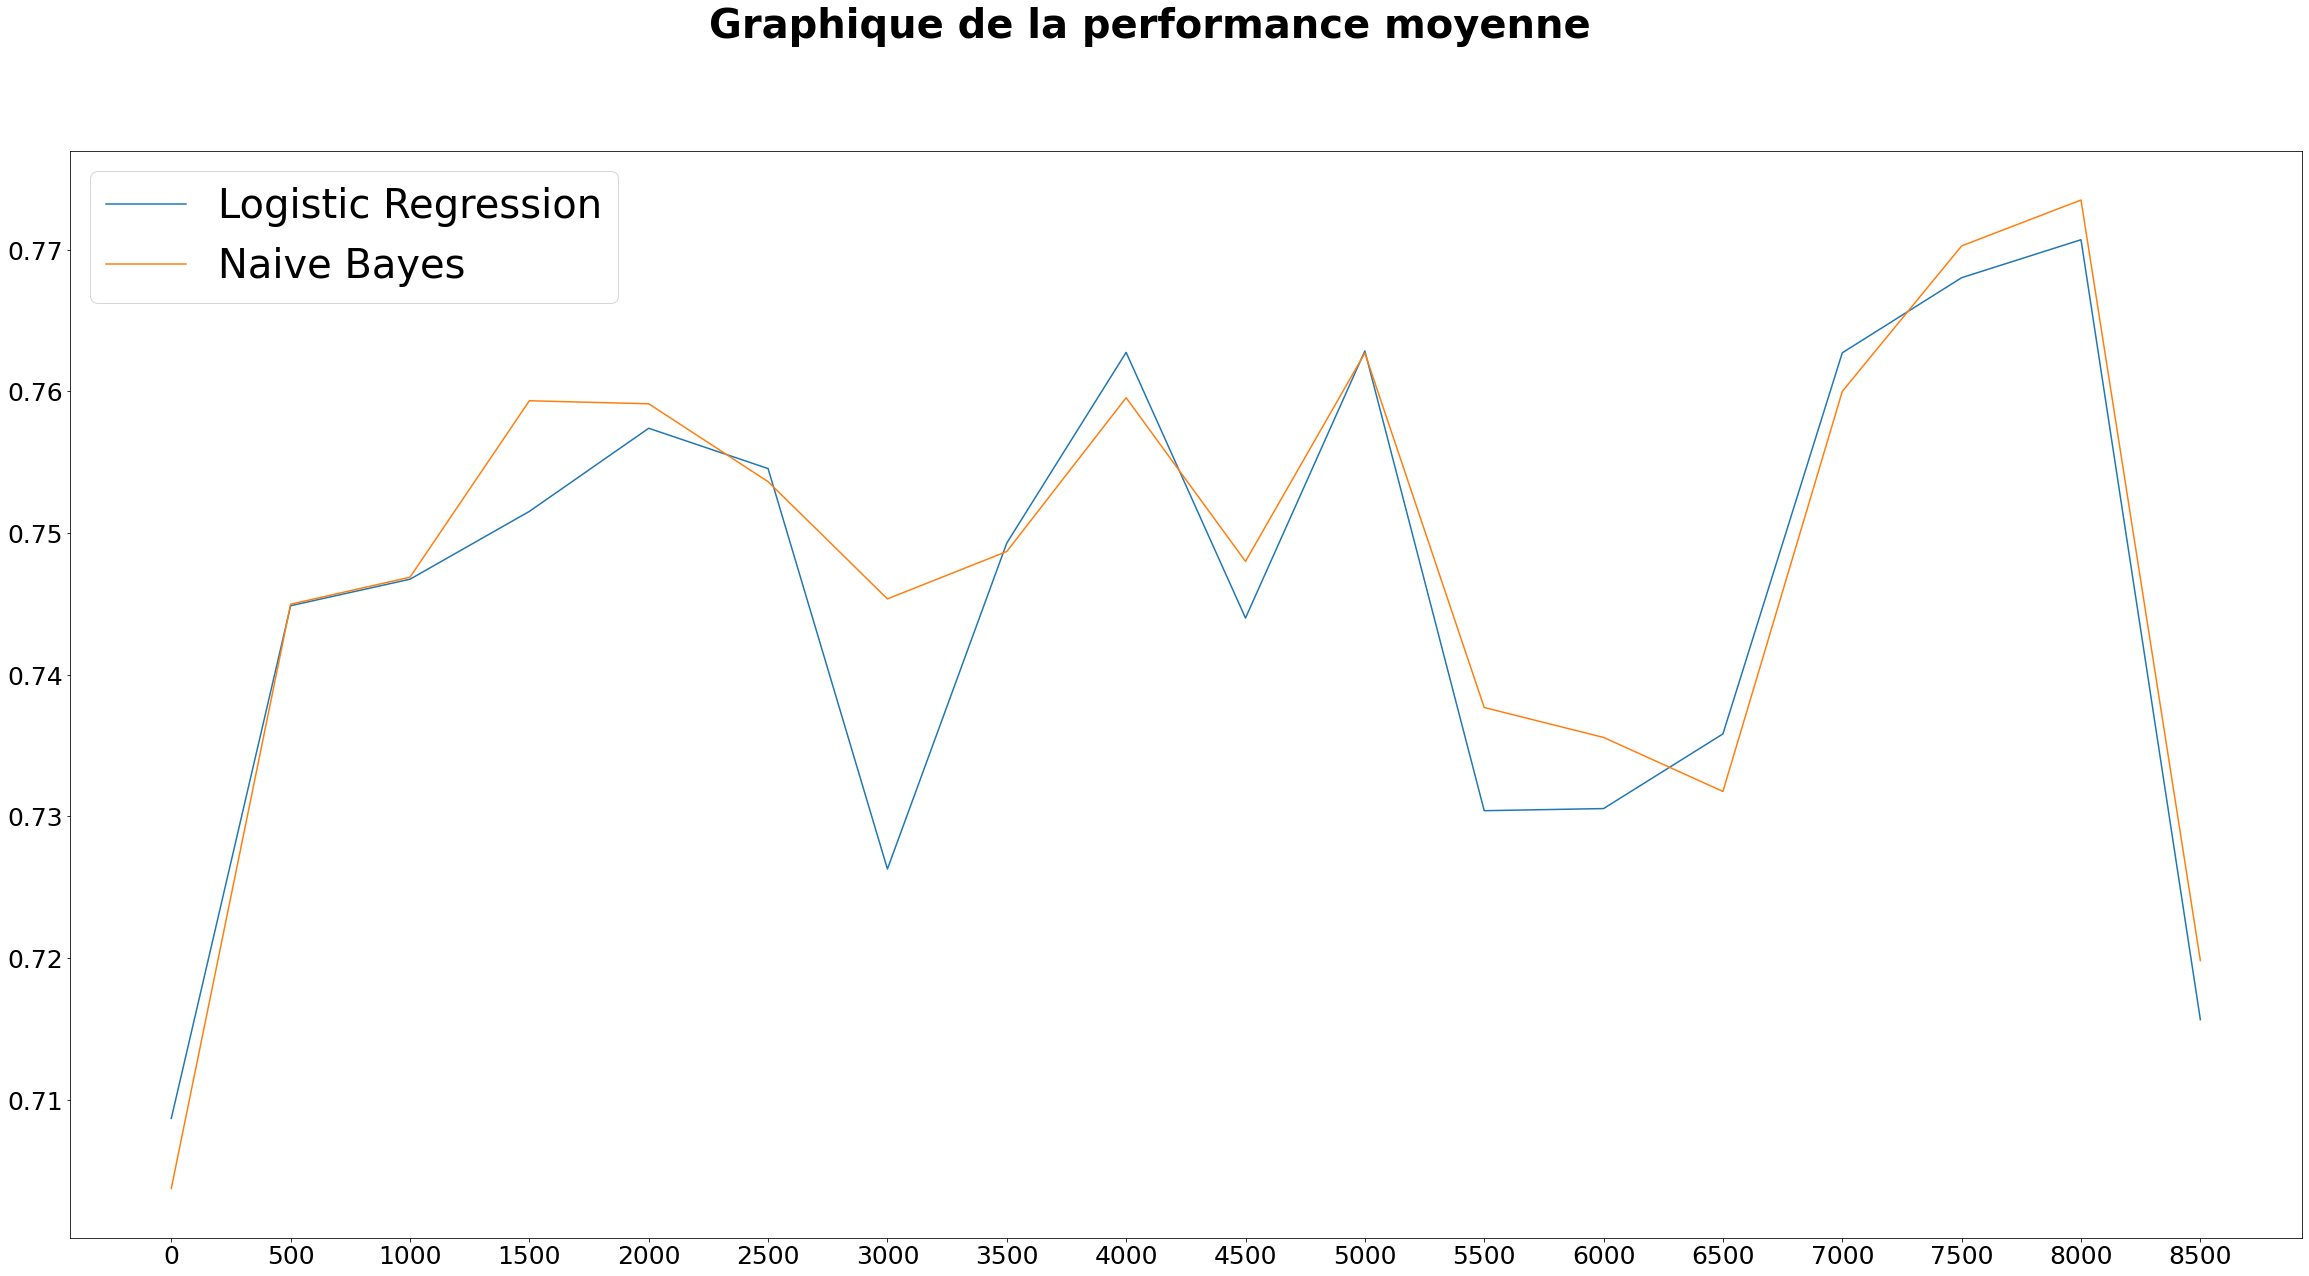

In [1155]:
GenerateMeanAccuranciesGraph()

#### c) Que se passe-t-il lorsque le paramètre de régularisation de la régression logisque (C) est augmenté ?

In [1156]:
print("For C = 1.0")
y_pred_regression = logisticsRegression(train_data, test_data,1.0)
print(classification_report(test_data[1], y_pred_regression) + "\n")

print("For C = 2.0")
y_pred_regression = logisticsRegression(train_data, test_data,2.0)
print(classification_report(test_data[1], y_pred_regression) + "\n")

print("For C = 5.0")
y_pred_regression = logisticsRegression(train_data, test_data,5.0)
print(classification_report(test_data[1], y_pred_regression))


For C = 1.0
              precision    recall  f1-score   support

       False       0.80      0.53      0.64       254
        True       0.86      0.95      0.90       751

    accuracy                           0.85      1005
   macro avg       0.83      0.74      0.77      1005
weighted avg       0.84      0.85      0.84      1005


For C = 2.0
              precision    recall  f1-score   support

       False       0.77      0.55      0.64       254
        True       0.86      0.95      0.90       751

    accuracy                           0.85      1005
   macro avg       0.82      0.75      0.77      1005
weighted avg       0.84      0.85      0.84      1005


For C = 5.0
              precision    recall  f1-score   support

       False       0.75      0.60      0.67       254
        True       0.87      0.93      0.90       751

    accuracy                           0.85      1005
   macro avg       0.81      0.77      0.78      1005
weighted avg       0.84      0.85   

Plus le paramètre de régulation logistique (C) augmente, plus la vraisemblance baisse.

Métrique précision :
Pour ce qui en est de la précision du sentiment négatif, elle diminue plus le C augmente 
contaiement à la précision du sentiment positif qui reste relativement stable soit env 0.86

Métrique recall :
Pour ce qui en est du rappel du sentiment négatif, il augmente plus le C augmente 
contaiement au rappel du sentiment positif qui reste relativement stable soit env 0.95

Métrique f1:
Quant au f1, il reste relativement constant avec une légère variation pour la classe False quand C= 5.0

La précision des moyennes micro et macro sont relativement semblables et ne
varient pas quand le C augmente : 0.83 et 0.84 pour C=1, 0.82 et 0.84 pour C=2, 0.81 et 0.84 pour C=5
Ceci reflète que l'ensemble des données est relativiement balancées entre les 2 classes. 

## 4. Analyse et discussion

#### a) En considérant les deux types de représentations, répondez aux question suivantes en reportant la question dans le notebook et en inscrivant votre réponse:

#### b) Quel est l’impact de l’annotation de la négation ?

Pour ce qui en est de uniquement appliquer l'annotation de la négation, le modèle de la regression
logistique présente un meilleur score pour le sentinement négatif : soit 0.47936 contre 0.38006
pour Naive Bayes. Pour le sentiment positif, le score est relativement le même : soit 0.88748 
contre 0.88770 pour Naive Bayes.

En combinant les étapes de pré-traitement, on a pu remarquer que l'ajout de la négation
améliore légèrement notre score pour le sentiment négatif pour les 2 modèles. À titre d'exemple :


                                     NAIVE BAYES                        REGRESSION LOGISTIQUE
--------------------|--------------------|--------------------|--------------------|--------------------
                    |        FAUX        |       VRAI         |        FAUX        |        VRAI
--------------------|--------------------|--------------------|--------------------|--------------------
stopWords           |      0.40964       |   0.88870          |    0.41752         |      0.88603
--------------------|--------------------|--------------------|--------------------|--------------------
stopWords, NEG.     |      0.43045       |   0.88895          |    0.42136         |      0.88520
--------------------|--------------------|--------------------|--------------------|--------------------
lemmes, tokenize    |      0.38305       |   0.88926          |    0.47203         |      0.88792           
--------------------|--------------------|--------------------|--------------------|--------------------
lemmes,tokenize, NEG|      0.39880       |   0.88605          |    0.47989         |      0.88721        
--------------------|--------------------|--------------------|--------------------|--------------------

L'ajout du _NEG premet de mieux différencer et d'avoir un meilleur résultat quant au sentiment
négatif et positif

#### c) La suppression des stopwords est-elle une bonne idée pour l’analyse de sentiments ?

#### d) Le stemming et/ou la lemmatisation sont-ils souhaitables dans le cadre de l’analyse de sentiments ?

## 5. Contribution

Complétez la section en haut du notebook indiquant la contribution de chaque membre de l’équipe en indiquant ce qui a été effectué par chaque membre et le pourcentage d’effort du membre dans le TP. 